# Modul 5 : Perbaikan Kualitas Citra

## 1. Lakukan perbaikan citra pada gambar sunf_2.jpg dengan menggunakan window/kernel 3x3, 5x5 dan 7x7 dengan menerapkan proses filtering :
## a. mean
## b. median
## c. modus

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = plt.imread("bunga.jpg")
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

plt.imshow(image, cmap="gray")
plt.title("Original Image")

FileNotFoundError: [Errno 2] No such file or directory: 'sunf_2.jpg'

### Konvolusi

In [ ]:
def getPadding (image, kernel):
    # mendapatkan titik tengah dari kernel
    i = (kernel.shape[1]-1)//2
    j = (kernel.shape[0]-1)//2
    # menghitung lapisan dari padding yang nanti akan digunakan
    kiri = i
    kanan = (kernel.shape[1]-1)-i
    atas = j
    bawah = (kernel.shape[0]-1)-j

    result = np.pad(image,((atas,bawah),(kiri,kanan)), 'constant', constant_values=0)
    return result

In [ ]:
def konvolusi(image, kernel):
    result = np.zeros(image.shape).astype(int)
    # mendapatkan padding zero secara dinamis dengan menggunakan titik tengah dari kernel
    imgPad = getPadding(image,kernel)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sum = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    sum += imgPad[i+k][j+l] * kernel[k, l]
            result[i, j] = sum
    return result

### a. Mean Filtering

In [ ]:
def meanFilter (image, lebarKernel, tinggiKernel):
    # membuat secara otomatis matriks persegi dengan ukurang yang kita inginkan dan semua nilai nya 1/besarkernel pangkat dua
    # untuk mendapatkan rata rata, misalkan array 3x3 maka 1/9, jika 5x5 maka 1/25, semakin besar kernelnya maka semakin blur hasil gambar
    kernel = np.full((lebarKernel, tinggiKernel), 1/(lebarKernel*tinggiKernel))
    result = konvolusi(image, kernel)
    return result

Text(0.5, 1.0, 'Mean Filtering 7x7')

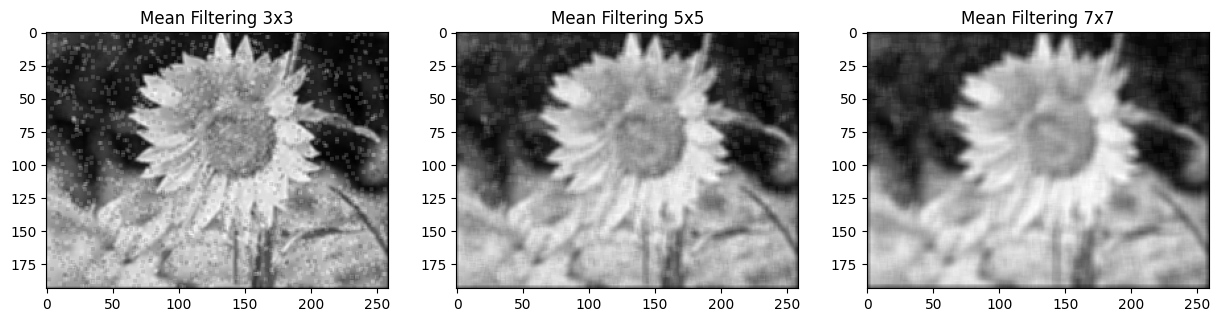

In [ ]:
mean3x3 = meanFilter(image,3,3)
mean5x5 = meanFilter(image,5,5)
mean7x7 = meanFilter(image,7,7)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
ax[0].imshow(mean3x3, cmap="gray")
ax[0].set_title('Mean Filtering 3x3')
ax[1].imshow(mean5x5, cmap="gray")
ax[1].set_title('Mean Filtering 5x5')
ax[2].imshow(mean7x7, cmap="gray")
ax[2].set_title('Mean Filtering 7x7')

### b. Median Filtering

In [ ]:
def getMid (array):
    array.sort()
    midIndeks = (len(array)-1)//2
    if len(array)%2 == 0:
        midValue = (array[midIndeks]+array[midIndeks+1])/2
    else :
        midValue = array[midIndeks]
    return midValue
def medianFilter(image, lebarFilter, tinggiFilter):
    filter = np.zeros((lebarFilter,tinggiFilter)).astype(int)
    result = np.zeros(image.shape)
    imgPad = getPadding(image,filter)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for x in range(lebarFilter):
                for y in range(tinggiFilter):
                    filter[x,y] = imgPad[i+x,j+y]
            filterReshape = filter.reshape(lebarFilter*tinggiFilter)
            result[i,j] = getMid(filterReshape)
    return result

Text(0.5, 1.0, 'Median Filtering 7x7')

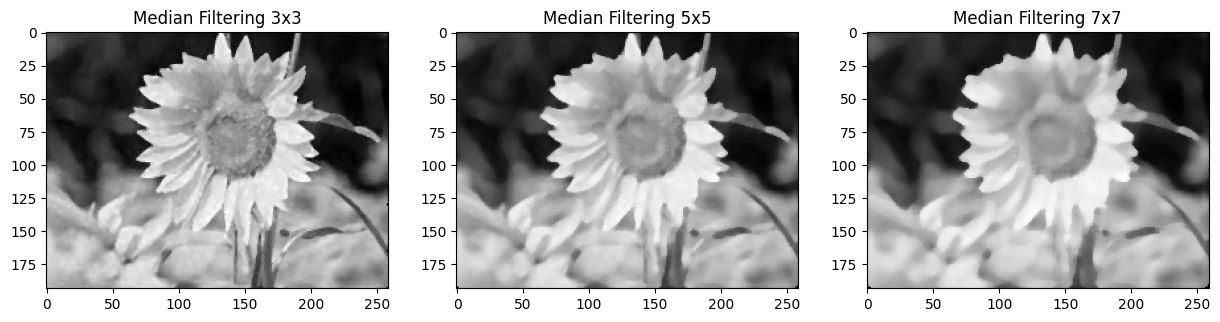

In [ ]:
median3x3 = medianFilter(image,3,3)
median5x5 = medianFilter(image,5,5)
median7x7 = medianFilter(image,7,7)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
ax[0].imshow(median3x3, cmap="gray")
ax[0].set_title('Median Filtering 3x3')
ax[1].imshow(median5x5, cmap="gray")
ax[1].set_title('Median Filtering 5x5')
ax[2].imshow(median7x7, cmap="gray")
ax[2].set_title('Median Filtering 7x7')

### Modus Filtering

In [ ]:
def getModus(array):
    kemunculan = np.zeros(array.max()+1).astype(int)
    for i in range(len(kemunculan)):
        for j in range(len(array)):
            if array[j]==i:
                kemunculan[i] +=1
    return np.argmax(kemunculan)

def modusFilter(image, lebarFilter, tinggiFilter):
    filter = np.zeros((lebarFilter,tinggiFilter)).astype(int)
    result = np.zeros(image.shape)
    imgPad = getPadding(image,filter)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for x in range(lebarFilter):
                for y in range(tinggiFilter):
                    filter[x,y] = imgPad[i+x,j+y]
            filterReshape = filter.reshape(lebarFilter*tinggiFilter)
            result[i,j] = getModus(filterReshape)
    return result

Text(0.5, 1.0, 'Modus Filtering 7x7')

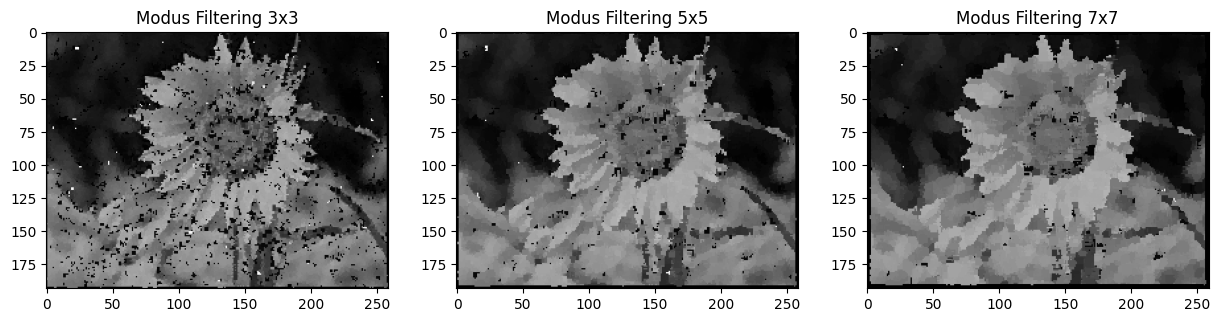

In [ ]:
modus3x3 = modusFilter(image,3,3)
modus5x5 = modusFilter(image,5,5)
modus7x7 = modusFilter(image,7,7)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
ax[0].imshow(modus3x3, cmap="gray")
ax[0].set_title('Modus Filtering 3x3')
ax[1].imshow(modus5x5, cmap="gray")
ax[1].set_title('Modus Filtering 5x5')
ax[2].imshow(modus7x7, cmap="gray")
ax[2].set_title('Modus Filtering 7x7')